In [31]:
<!-- Matomo -->
<script type="text/javascript">
  var _paq = window._paq = window._paq || [];
  /* tracker methods like "setCustomDimension" should be called before "trackPageView" */
  _paq.push(['trackPageView']);
  _paq.push(['enableLinkTracking']);
  (function() {
    var u="https://odin.md2k.org/matomo/";
    _paq.push(['setTrackerUrl', u+'matomo.php']);
    _paq.push(['setSiteId', '1']);
    var d=document, g=d.createElement('script'), s=d.getElementsByTagName('script')[0];
    g.type='text/javascript'; g.async=true; g.src=u+'matomo.js'; s.parentNode.insertBefore(g,s);
  })();
</script>
<!-- End Matomo Code -->

SyntaxError: invalid syntax (<ipython-input-31-b8fc2632d2d1>, line 1)

In [30]:
import numpy as np
import pandas as pd
import plotly.express as px
stressors_dict={"Stressors":["Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety"],"Duration":[50,19,30,70,18,1,23,45]}
df=pd.DataFrame.from_dict(stressors_dict)
df=df.sort_values(["Duration"],ascending=False)

fig = px.bar_polar(df, r="Duration", theta="Stressors",labels="Duration",
                   color="Stressors", template="plotly_dark",barmode="relative",
                   color_discrete_sequence= px.colors.sequential.Plasma_r, title="Total Duration of Stressed Minutes per hour in this week")
fig.update_layout(showlegend=False,template="seaborn")
# fig.layout.template="plotly-white"

fig.show()

In [2]:
import plotly.graph_objects as go
# 'top left', 'top center', 'top right', 'middle center',
#             'bottom left', 'bottom center', 'bottom right']


# Use `hole` to create a donut-like pie chart
fig1 = go.Figure(data=[go.Pie(labels=df["Stressors"], values=df["Duration"], automargin=False,
                              hole=.5,textinfo='label+value+text', 
                              title={'text':"Total Duration of Stressed Minutes <br>  per hour in this week",
                                    'position':'middle center'},
                            insidetextorientation='radial',textposition="outside",showlegend=False)])
fig1.show()

[6]
16


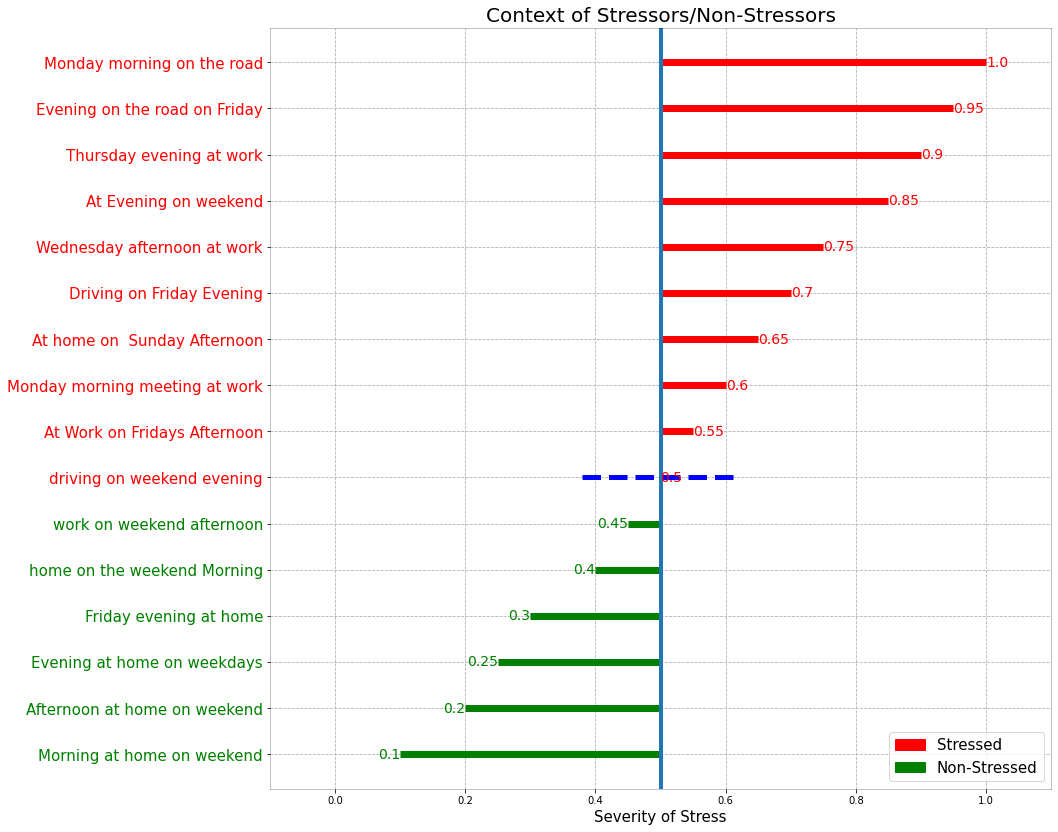

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
days_of_week=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday','Sunday']
a=days_of_week
time_of_the_day=['Morning','Afternoon','Evening']
b=time_of_the_day
type_of_week=['Weekdays','Weekend']
c=type_of_week
location=["Home","Work","On the road","Others"]
d=location
prep_words=["at","on","in","the"]
e=prep_words
stressors_dict={"Stressors":["Morning at home on weekend", "Afternoon at home on weekend","Friday evening at home",
                            "Evening at home on weekdays","home on the weekend Morning", "work on weekend afternoon", "driving on weekend evening",
                            "At Work on Fridays Afternoon", "Monday morning meeting at work","At home on  Sunday Afternoon",
                            "Driving on Friday Evening","Wednesday afternoon at work", "At Evening on weekend",
                             "Thursday evening at work", "Evening on the road on Friday","Monday morning on the road"],                 
                "Stressed":[0.1,0.2,0.3,0.25,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.85,0.9,0.95,1.0]}


df=pd.DataFrame.from_dict(stressors_dict)

df['colors'] = ['green' if x < 0.5 else 'red' for x in df['Stressed']]
df.sort_values('Stressed', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig2, ax = plt.subplots(figsize=(14,14))
plt.hlines(y=df.index, xmin=0.5, xmax=df.Stressed,colors=df["colors"],linewidth=7.0)
for x, y, tex in zip(df.Stressed, df.index, df.Stressed):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0.5 else 'left', 
                 verticalalignment='center', fontdict={'color':'green' if x < 0.5 else 'red', 'size':14})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.Stressors)
a=df.index[df['Stressed'] == 0.5].tolist()
plt.yticks(df.index, df.Stressors,fontsize=15,color="g")
for i in range(a[0],len(df)):
    ax.get_yticklabels()[i].set_color("red")
plt.title('Context of Stressors/Non-Stressors', fontdict={'size':20})
plt.xlabel('Severity of Stress', fontdict={'size':15})
plt.grid(linestyle='--', alpha=1)
plt.xlim(-0.1, 1.1)

print(a)
plt.axvline(x=0.5,linewidth=4.0)
plt.axhline(y=a[0], xmin=0.4, xmax=0.6, color='b',linewidth=5.0,linestyle="--")
print(len(df))

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
red_patch = mpatches.Patch(color='red', label='Stressed')
green_patch = mpatches.Patch(color='green', label='Non-Stressed')
plt.legend(handles=[red_patch,green_patch],loc="lower right",prop={"size":15})
# plt.savefig("Context_bar.jpeg",bbox_inches='tight')

import matplotlib.pyplot as plt
import base64
from io import BytesIO

tmpfile = BytesIO()
plt.savefig(tmpfile, format='jpeg',bbox_inches='tight')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
html = '<img src=\'data:image/png;base64,{}\'>'.format(encoded) 
with open('Context_bar.html','w') as f:
    f.write(html)

In [4]:
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from math import log10

# stressors_dict={"Stressors":["Transportation","Work/School","Finance","Friends/Family","Health","Personal",
#                             "Social Media","Safety"],"Count":[50,19,30,70,18,1,23,45]}
# labels=stressors_dict["Stressors"]
# data = sorted(stressors_dict["Count"])
# data.sort(reverse=True)

# labels_count=[]
# for i in range(0,len(stressors_dict["Stressors"])):
#     labels_count.append(stressors_dict["Stressors"][i] + "--" + str(stressors_dict["Count"][i]))

# print(labels_count)
# #number of data points
# n = len(data)
# #find max value for full ring
# k = 10 ** int(log10(max(data)))
# m = k * (1 + max(data) // k)

# #radius of donut chart
# r = 1.0
# #calculate width of each ring
# w = r / n 

# #create colors along a chosen colormap
# colors = [cm.viridis(i / n) for i in range(n)]

# #create figure, axis
# fig3, ax = plt.subplots(figsize=(15,15))
# ax.axis("equal")

# #create rings of donut chart
# for i in range(n):
# #     hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
#     innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90,rotatelabels = False, labels = ["", labels_count[i]], labeldistance = 1 - 1 / (2.5 * (n - i)), textprops = {"alpha": 0,"fontsize":14}, colors = ["white", colors[i]])
#     plt.setp(innerring, width = w, edgecolor = "white")

# plt.legend(prop={'size': 12},loc="upper left")
# plt.savefig("radial")
# import matplotlib.pyplot as plt
# import base64
# from io import BytesIO
# # fig = plt.figure()
# #plot sth
# tmpfile = BytesIO()

# plt.savefig(tmpfile, format='png',bbox_inches='tight')
# encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
# html2 = '<img src=\'data:image/png;base64,{}\'>'.format(encoded) 

In [5]:
from __future__ import unicode_literals
import numpy as np
import pandas as pd
from pyecharts_snapshot.main import make_a_snapshot
from pyecharts.charts import Pie
from pyecharts import options as opts
stressors_dict={"Stressors":["Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety"],"Count":[50,19,30,70,18,1,23,45]}
df=pd.DataFrame.from_dict(stressors_dict)
df=df.sort_values(["Count"],ascending=False)
c = df["Stressors"].values.tolist()
d = df["Count"].values.tolist()
#create the color_series for the rosechart
color_series = ["#802200","#B33000","#FF4500","#FAA327","#9ECB3C",
 "#6DBC49","#F57A34","#14ADCF"]
# page = Page()             
rosechart = Pie(init_opts=opts.InitOpts(width='1000px', height='1000px'))
# set the color
rosechart.set_colors(color_series)
# add the data to the rosechart
rosechart.add("", [list(z) for z in zip(c, d)],
        radius=["10%", "55%"],  # 20% inside radius，95% ourside radius
        center=["50%", "50%"],   # center of the chart
        rosetype="area")
# set the global options for the chart
rosechart.set_global_opts(title_opts=opts.TitleOpts( title="Total Duration of Stressed Minutes per hour in this week"
                                                    ),
                     legend_opts=opts.LegendOpts(is_show=False),
                     toolbox_opts=opts.ToolboxOpts())
# set the series options
rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="outside", font_size=12,formatter="{b}:{c}", font_style="italic",font_weight="bold", font_family="Century"),)
# rosechart.render_notebook()
# page.add(rosechart)  # step 2

rosechart.render() 

import matplotlib.pyplot as plt
import base64
from io import BytesIO
# fig = plt.figure()
#plot sth
tmpfile = BytesIO()

# plt.savefig(tmpfile, format='png',bbox_inches='tight')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
html1 =  '<img src=\'data:image/png;base64,{}\'>'.format(encoded) 
import codecs
import os
p=codecs.open("render.html", 'r',encoding='utf-8')
with open('render.html', 'r') as f:
    html_string = f.read()

os.remove("render.html")

In [6]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
from pandas.api.types import CategoricalDtype
                       
cats = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df = pd.read_csv("Stressors_weekdays_timeofday.csv")
temp3=df.groupby(['Day','Stressors'], as_index=False)['Frequency'].sum()
temp3['Day'] = pd.Categorical(temp3['Day'], categories=cats, ordered=True)
temp3 = temp3.sort_values(['Day'])
fig5 = px.bar(temp3, x="Frequency", y="Day", facet_col="Stressors", orientation='h',
             color="Stressors",facet_col_spacing=0.03,facet_row_spacing=0.15,facet_col_wrap=3,
              category_orders={"Day":cats}
            )


fig5.update_layout(barmode='overlay')
# fig.update_yaxes(matches=None)
# fig9.update_yaxes( secondary_y=False)
# fig7.update_xaxes( secondary_x=False)
fig5.update_layout(showlegend=False)
# fig9.update_xaxes(showgrid=True, ticks="outside")
# fig9.update_yaxes(showgrid=True, ticks="outside")

fig5.update_layout(
    
    xaxis_title="Frequency",
    title="Frequency of different stressors across days of week",
    legend_title="Week",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
# fig9.show()

In [28]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
from pandas.api.types import CategoricalDtype
                       
cats = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df = pd.read_csv("Stressors_weekdays_timeofday.csv")
temp3=df.groupby(['Location',"Stressors"], as_index=False)['Frequency'].sum()
# temp3['Day'] = pd.Categorical(temp3['Day'], categories=cats, ordered=True)
# temp3 = temp3.sort_values(['Day'])
fig6 = px.bar(temp3, x="Frequency", y="Location", facet_col="Stressors", orientation='h',
             color="Stressors",facet_col_spacing=0.03,facet_row_spacing=0.15,facet_col_wrap=3,
              category_orders={"Day":cats}
            )


fig6.update_layout(barmode='overlay')
# fig.update_yaxes(matches=None)
# fig9.update_yaxes( secondary_y=False)
# fig7.update_xaxes( secondary_x=False)
fig6.update_layout(showlegend=False)
# fig9.update_xaxes(showgrid=True, ticks="outside")
# fig9.update_yaxes(showgrid=True, ticks="outside")

fig6.update_layout(
    
    xaxis_title="Frequency",
    title="Frequency of different stressors across places",
    legend_title="Week",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
# fig9.show()

In [8]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
from pandas.api.types import CategoricalDtype
                       
cats = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df = pd.read_csv("Stressors_weekdays_timeofday.csv")
temp3=df.groupby(['Time of day',"Stressors"], as_index=False)['Frequency'].sum()
# temp3['Day'] = pd.Categorical(temp3['Day'], categories=cats, ordered=True)
# temp3 = temp3.sort_values(['Day'])
fig7 = px.bar(temp3, x="Frequency", y="Time of day", facet_col="Stressors", orientation='h',
             color="Stressors",facet_col_spacing=0.03,facet_row_spacing=0.15,facet_col_wrap=3,
              category_orders={"Day":cats}
            )


fig7.update_layout(barmode='overlay')
# fig.update_yaxes(matches=None)
# fig9.update_yaxes( secondary_y=False)
# fig7.update_xaxes( secondary_x=False)
fig7.update_layout(showlegend=False)
# fig9.update_xaxes(showgrid=True, ticks="outside")
# fig9.update_yaxes(showgrid=True, ticks="outside")

fig7.update_layout(
    
    xaxis_title="Frequency",
    title="Frequency of different stressors across time of day",
    legend_title="Week",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
# fig9.show()

In [9]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
# df = pd.read_csv("stressed_minutes_week - Sheet1.csv")
df = pd.read_csv("Stressors_weekdays_timeofday.csv")
temp3=df.groupby(['Week','Day','Stressors'], as_index=False)['Frequency'].sum()
temp3["Week"]=temp3["Week"].astype("category")
fig10 = px.bar(temp3, x="Frequency", y="Week", facet_col="Stressors", orientation='h',
             color="Stressors",labels="Week",facet_col_spacing=0.03,facet_row_spacing=0.15,facet_col_wrap=3,
            )
fig10.update_layout(barmode='overlay')
# fig.update_yaxes(matches=None)
fig10.update_yaxes( secondary_y=False)
# fig7.update_xaxes( secondary_x=False)
fig10.update_layout(showlegend=False)
fig10.update_xaxes(showgrid=True, ticks="outside")
fig10.update_yaxes(showgrid=True, ticks="outside")
fig10.update_yaxes(type='category')
fig10.update_layout(
    
    xaxis_title="Frequency",
    title="Frequency of different stressors across weeks",
    legend_title="Week",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)
fig10.show()

In [10]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
# df = pd.read_csv("stressed_minutes_week - Sheet1.csv")
cats = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
temp3=df.groupby(['Week','Day','Stressors'], as_index=False)['Frequency'].sum()
# week=df["Time of day"].values.tolist()
temp3["Week"] = temp3.Week.astype("category")
temp3['Day'] = pd.Categorical(temp3['Day'], categories=cats, ordered=True)
temp3 = temp3.sort_values(['Week','Day'])
# time=df["Stressed minutes"].values.tolist()
# week1=df["Week"].values.tolist()
fig11 = px.bar(temp3, x="Frequency", y="Week", facet_col="Day", orientation='h',
             color="Stressors",labels="Stressors",facet_col_spacing=0.03,facet_row_spacing=0.15,facet_col_wrap=3,
              category_orders={"Day":cats}
            )
fig11.update_layout(barmode='group')
# fig.update_yaxes(matches=None)
fig11.update_yaxes( secondary_y=False)
# fig7.update_xaxes( secondary_x=False)
# fig9.update_layout(showlegend=False)
fig11.update_xaxes(showgrid=True, ticks="outside")
fig11.update_yaxes(showgrid=True, ticks="outside")
fig11.update_yaxes(type='category')
fig11.update_layout(
    
    xaxis_title="Frequency",
    title="Frequency of different stressors across days of week and weeks",
    legend_title="Week",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig11.show()


In [11]:
import plotly
import pandas as pd
df=pd.read_csv("Stressors_weekdays_timeofday.csv")
cats = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df=df.groupby(['Week','Time of day','Stressors'], as_index=False)['Frequency'].sum()
# df['Day'] = pd.Categorical(df['Day'], categories=cats, ordered=True)
# df = df.sort_values('Day')
fig12 = px.scatter(df, x="Time of day", y="Week",  color="Stressors", facet_col="Stressors",template="seaborn",               
               size="Frequency",facet_col_wrap=3,
              
               category_orders={"Location": ["Home", "Work","On the road","Others"],
                               "Time of day": ["Morning", "Afternoon","Evening"],                              
                               "Day":  [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']})
fig12.update_layout(
    autosize=True,showlegend=False, 
    font=dict(
        
        size=10,
        color="Black"
    ),
    title="Occurences of Stressors across time of day and week ( Size of the bubble indicates the number of occurences)")
fig12.update_yaxes(type='category')
fig12.show()

In [12]:
import plotly
import pandas as pd
df=pd.read_csv("Stressors_weekdays_timeofday.csv")
cats = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df=df.groupby(['Week','Location','Stressors'], as_index=False)['Frequency'].sum()
# df['Day'] = pd.Categorical(df['Day'], categories=cats, ordered=True)
# df = df.sort_values('Day')
fig13 = px.scatter(df, x="Location", y="Week",  color="Stressors", facet_col="Stressors",template="seaborn",               
               size="Frequency",facet_col_wrap=3,
              
               category_orders={"Location": ["Home", "Work","On the road","Others"],
                               "Time of day": ["Morning", "Afternoon","Evening"],                              
                               "Day":  [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']})
fig13.update_layout(
    autosize=True,showlegend=False,
font=dict(
        
        size=10,
        color="Black"
    ),
    title="Occurences of Stressors across Location and week ( Size of the bubble indicates the number of occurences)")
fig13.update_yaxes(type='category')
fig13.show()


In [13]:
import plotly
import pandas as pd
df=pd.read_csv("Stressors_weekdays_timeofday.csv")
cats = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df=df.groupby(['Stressors','Location','Time of day',], as_index=False)['Frequency'].sum()
# df['Day'] = pd.Categorical(df['Day'], categories=cats, ordered=True)
# df = df.sort_values('Day')
fig14 = px.scatter(df, x="Location", y="Time of day",  color="Stressors", facet_col="Stressors",template="seaborn",               
               size="Frequency",facet_col_wrap=3,
              
               category_orders={"Location": ["Home", "Work","On the road","Others"],
                               "Time of day": ["Morning", "Afternoon","Evening"],                              
                               "Day":  [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']})
fig14.update_layout(
    autosize=True,showlegend=False,
    font=dict(        
        size=10,
        color="Black"),
    title="Occurences of Stressors across time of day and Location (Size of the bubble indicates the number of occurences")
fig14.update_yaxes(type='category')
fig14.show()


In [14]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
# df = pd.read_csv("stressed_minutes_week - Sheet1.csv")
df = pd.read_csv("Stressors_weekdays_timeofday.csv")
temp3=df.groupby(['Stressors','Location'], as_index=False)['Frequency'].sum()

fig15 = px.bar(temp3, x="Frequency", y="Stressors", orientation='h',text="Location",
             color="Location",labels="Week",facet_col_spacing=0.03,facet_row_spacing=0.15,facet_col_wrap=3,
            )
fig15.update_layout(barmode='group',showlegend=False,
                   font=dict(
        
        size=10,
        color="Black"
    ),
    title="Occurences of Stressors across Location ( Size of the bubble indicates the number of occurences)")
fig15.show()

In [15]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
# df = pd.read_csv("stressed_minutes_week - Sheet1.csv")
df = pd.read_csv("Stressors_weekdays_timeofday.csv")
temp3=df.groupby(['Stressors','Location'], as_index=False)['Frequency'].sum()

fig16 = px.bar(temp3, x="Frequency", y="Stressors", orientation='h',text="Location",
             color="Location",labels="Week",facet_col_spacing=0.03,facet_row_spacing=0.15,facet_col_wrap=3,
            )
fig16.update_layout(barmode='stack',showlegend=False)
fig16.show()

In [16]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
# df = pd.read_csv("stressed_minutes_week - Sheet1.csv")
df = pd.read_csv("Stressors_weekdays_timeofday.csv")
temp3=df.groupby(['Stressors','Time of day'], as_index=False)['Frequency'].sum()

fig17 = px.bar(temp3, x="Frequency", y="Stressors", orientation='h',text="Time of day",
             color="Time of day",labels="Week",facet_col_spacing=0.03,facet_row_spacing=0.15,facet_col_wrap=3,
               category_orders={"Time of day":["Morning","Afternoon","Evening"]}
            )
fig17.update_layout(barmode='group',showlegend=False,
                   font=dict(
        
        size=10,
        color="Black"
    ),
    title="Occurences of Stressors across time of day  ( Size of the bubble indicates the number of occurences)")
fig17.show()

In [17]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
# df = pd.read_csv("stressed_minutes_week - Sheet1.csv")
df = pd.read_csv("Stressors_weekdays_timeofday.csv")
temp3=df.groupby(['Stressors','Time of day'], as_index=False)['Frequency'].sum()

fig18 = px.bar(temp3, x="Frequency", y="Stressors", orientation='h',text="Time of day",
             color="Time of day",labels="Week",facet_col_spacing=0.03,facet_row_spacing=0.15,facet_col_wrap=3,
               category_orders={"Time of day":["Morning","Afternoon","Evening"]}
            )
fig18.update_layout(barmode='relative',showlegend=False)
fig18.show()

In [18]:
import plotly.graph_objects as go
import plotly
data=pd.read_csv("week of stream_graph - Sheet1.csv")
df2=data.pivot_table(index='Week', columns='Stressors', values='Count')
df2=df2.fillna(0)
df2=df2.reset_index()
fig8 = go.Figure()
temp=["Week 1 ","Week 2","Week 3","Week 4","Week 5","Week 6",
                            "Week 7","Week 8"]
fig8.add_trace(go.Barpolar(
    r = list(df2['Finance']),
    theta=temp,
    name = 'Finance',
    marker_color='rgb(46,109,255)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.5  
))


fig8.add_trace(go.Barpolar(
    r = list(df2['Friends/Family']),
    theta=temp,
    name = 'Friends/Family',
    marker_color='rgb(139,222,52)',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

fig8.add_trace(go.Barpolar(    
    r = list(df2['Health']),
    theta=temp,
    name = 'Health',
    marker_color='teal', 
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))
fig8.add_trace(go.Barpolar(
    r = list(df2['Personal']),
    theta=temp,
    name = 'Personal',
    marker_color='darkolivegreen',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7   
))


fig8.add_trace(go.Barpolar(
    r = list(df2['Safety']),
    theta=temp,
    name = 'Safety',
    marker_color='deeppink',
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

fig8.add_trace(go.Barpolar(    
    r = list(df2['Social Media']),
    theta=temp,
    name = 'Social Media',
    marker_color='chocolate', 
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))
fig8.add_trace(go.Barpolar(    
    r = list(df2['Transportation']),
    theta=temp,
    name = 'Transportation',
    marker_color='purple', 
    marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.7
))

fig8.update_layout(
    title='Stressors over weeks',
    font_size=12,
    legend_font_size=15,
    polar_angularaxis_rotation=90,
    
    
    polar = dict(
              bgcolor = "rgb(223, 223, 223)",
              angularaxis = 
                dict(
                    linewidth = 7,
                    showline=True,
                    linecolor='black'
                    ),
          radialaxis = 
                dict(  
                    
                    showline = True,
                    linewidth = 2,
                    gridcolor = "white",
                    gridwidth = 2,
                    )
                ),

            )
fig8.show()
# plotly.offline.plot(fig, filename='Stressors.html')

In [19]:
import plotly.graph_objects as go
import plotly
import plotly.express as px

fig3 = go.Figure()
temp=["Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety"]

stressors_dict={"Stressors":["Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety","Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety","Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety","Transportation","Work/School","Finance","Friends/Family","Health","Personal",
                            "Social Media","Safety"],
                "Frequency":[5,1,3,7,3,1,4,4,6,1,5,4,5,2,3,4,5,1,3,7,3,1,4,4,6,1,5,4,5,2,3,4],"Week":["1","1","1","1","1","1","1","1","2","2","2","2","2","2","2","3"
                                                                                                      ,"3","3","3","3","3","3","3","4","4","4","4","4","4","4","4","4"]}
print(len(stressors_dict["Week"]))
df1=pd.DataFrame.from_dict(stressors_dict)
fig9 = px.bar_polar(df1, r="Frequency", theta="Stressors",
                   color="Week", color_discrete_map={
                "1": "yellow",
                "2": "green",
                "3": "blue",
               "4": "red",
                "5": "red"})
fig9.update_layout(
    title='Stressors over weeks',
    font_size=12,
    legend_font_size=15,
    polar_angularaxis_rotation=90,
    
    polar = dict(
              bgcolor = "rgb(223, 223, 223)",
              angularaxis = 
                dict(
                    linewidth = 7,
                    showline=True,
                    linecolor='black'
                    ),
          radialaxis = 
                dict(  
                    
                    showline = True,
                    linewidth = 2,
                    gridcolor = "white",
                    gridwidth = 2,
                    )
                ),

            )
fig9.show()
# plotly.offline.plot(fig, filename='Stressors_week.html')

32


In [33]:
import pandas as pd
df1=pd.read_csv("Stressors_weekdays_timeofday.csv")

import plotly.express as px
fig19=px.sunburst(df1, path=[ 'Stressors', 'Location','Time of day'], values='Frequency',color='Stressors')

fig19.show()


In [21]:

import plotly.graph_objects as go
fig6 = go.Figure()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd


x = np.array([5,5,20,8,6,6,11,11,3,3,18,17,19,20,21,9,5,5,20,8,6,6,11,11,3,3,18,17,19,20,21,9])
y = np.array([2,5,1,3,5,4,4,9,3,1,2,3,2,1,4,5,2,5,1,3,5,4,4,9,3,1,2,3,2,1,4,5])
z=[0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7]
cluster = np.array([1,2,3,4,5,3,1,4,3,2,4,5,2,3,1,4,1,2,3,4,5,3,1,4,3,2,4,5,2,3,1,4]) 
cluster_map={
    1:"Anxiety", 
    2:"Assault", 
    3:"Exam preparation", 
    4:"Household Chores", 
    5:"Lack of nutrition", 
}
df = pd.DataFrame()
df["Severity"]=z
df["Duration of each stress episode (mins)"]=x
df["Frequency"]=y
df["Cluster"]=cluster
# df["Total Duration of stress episodes (mins) in this week"]=df["Frequency"]*df["Duration of each stress episode (mins)"]
df["Total Duration of stress episodes (mins)"]=df["Frequency"]*df["Duration of each stress episode (mins)"]
df['Stressors'] = df['Cluster'].map(cluster_map)
order=["Household Chores","Anxiety","Assault","Exam preparation","Lack of nutrition"]
df['Stressors'] = pd.Categorical(df['Stressors'], categories=order, ordered=True)
df = df.sort_values('Stressors')
stressors =df.Stressors.unique()
fig20=go.Figure()
for stressor in stressors:
    fig20.add_trace(go.Violin(x=df['Stressors'][df['Stressors'] == stressor],
                            y=df['Duration of each stress episode (mins)'][df['Stressors'] == stressor],
                            name=stressor,
                            box_visible=True,
                            meanline_visible=True))
fig20.update_traces(meanline_visible=True,
                  points='all', # show all points
                  jitter=0.05,  # add some jitter on points for better visibility
                  scalemode='count')
fig20.update_yaxes(title_text='Duration of each stress episode (mins)')
fig20.update_traces(showlegend=False)
fig20.show()
# plotly.offline.plot(fig, filename='violin_color1.html')


In [22]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv("stressed_minutes_week - Sheet1.csv")
stressors=df["Stressors"].values.tolist()
df["Week"] = df["Week"].astype(str)
time=df["Stressed minutes"].values.tolist()
week1=df["Week"].values.tolist()
fig21 = px.bar(df, x="Stressed minutes", y="Week", facet_col="Stressors", orientation='h',
             color="Week",labels="Week",facet_col_wrap=1,
#             color_discrete_sequence=["red","red","red","red","black","red","red","red","red","green","red","red","red","red","green"])
        color_discrete_map={
                "1": "grey",
                "2": "grey",
                "3": "grey",
               "4": "grey",
                "5": "red"})
# fig = go.Figure(data=[
#     go.Bar( x=week, y=time)
# ])
# Change the bar mode
fig21.add_shape(
    dict(type="line", x0=15, x1=15, y0="0", y1="6",line_color="green"), row=0, col=0)
fig21.add_shape(
    dict(type="line", x0=14, x1=14, y0="0", y1="6", line_color="green"), row=1, col=0)
fig21.add_shape(
    dict(type="line", x0=12, x1=12, y0="0", y1="6", line_color="green"), row=2, col=0)
fig21.add_shape(
    dict(type="line", x0=14, x1=14, y0="0", y1="6", line_color="black"), row=0, col=0)
fig21.add_shape(
    dict(type="line", x0=10, x1=10, y0="0", y1="6", line_color="black"), row=1, col=0)
fig21.add_shape(
    dict(type="line", x0=8, x1=8, y0="0", y1="6", line_color="black"), row=2, col=0)

# fig21.add_annotation(x=25, y=5,
#             text="Green line indicates population average",
#         showarrow=False
#            )

# fig21.add_annotation(x=25, y=4,
#             text="Black line indicates personal average across previous weeks",
#         showarrow=False
#            )
fig21.update_layout(barmode='relative')
# fig.update_yaxes(matches=None)
fig21.update_yaxes( secondary_y=False)
fig21.update_layout(showlegend=False)
fig21.update_xaxes(showgrid=True, ticks="outside")
fig21.update_yaxes(showgrid=True, ticks="outside")

fig21.update_layout(
    
    xaxis_title="Stressed minutes per hour",
    title="Stressed minutes per hour for different stressors. Green line indicates population average <br> \
    Black line indicates personal average " ,
title_font_family="TImes New Roman",
     title_font_color="Black",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig21.update_layout(
    title={
        'text': "Stressed minutes per hour for different stressors. Green line indicates population average & Black line indicates personal average" ,
        
        'xanchor': 'auto',
        'yanchor': 'auto'})
fig21.show()

In [23]:
import plotly.graph_objects as go

fig22 = go.Figure()

fig22.add_trace(go.Indicator(
    mode = "number",
    value = 150,
    domain = {'row': 0, 'column': 0},
     title ="Average  stressed minutes per hour"))

fig22.add_trace(go.Indicator(
    mode = "number",
    value = 9,
    domain = {'row': 0, 'column': 1},
     title ="Average weekly number of stressors"))

fig22.add_trace(go.Indicator(
    value = 200,
    delta = {'reference': 150},
   gauge = {
        
        'axis' : {'visible': True},
    'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.9,
            'value': 150}},
    domain = {'row': 2, 'column': 0}))

fig22.add_trace(go.Indicator(
    value = 120,
    delta = {'reference': 150},
    gauge = {
        
        'axis' : {'visible': True,'range': [None, 300]},
    'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.9,
            'value': 150}},
    domain = {'row': 4, 'column': 0}))

fig22.add_trace(go.Indicator(
    mode = "number+delta",
    value = 10,
    domain = {'row': 2, 'column': 1},
     title ="Number of Stressors this week"))

fig22.add_trace(go.Indicator(
    mode = "number + delta",
    value = 6,
    domain = {'row': 4, 'column': 1},
    title="Number of Stressors this week"))

fig22.update_layout(
    grid = {'rows': 5, 'columns': 2, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'title': {'text': "Stressed Minutes per hour this week"},
        'mode' : "number+delta+gauge",
        'delta' : {'reference': 9}}]
                         }})



fig22.show()
# fig.write_html("fig5.html")

In [24]:
import plotly.graph_objects as go

fig23 = go.Figure()

fig23.add_trace(go.Indicator(
    mode = "gauge", value = 40,
    delta = {'reference': 25},
#     domain = {'row': 0, 'column': 1},
    domain = {'x': [0.25, 1], 'y': [0.1, 0.2]},
    title = {'text': "Finance"},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100]},
        'threshold': {
            'line': {'color': "black", 'width': 2},
            'thickness': 0.75,
            'value': 25},
         'steps': [
            {'range': [0, 75], 'color': "lightgray"}],
        'bar': {'color': "black"}}))

fig23.add_trace(go.Indicator(
    mode = "gauge", value = 55,
    align='right',
    delta = {'reference': 40},
#     domain = {'row': 1, 'column': 1},
    domain = {'x': [0.25, 1], 'y': [0.3, 0.4]},
    title = {'text': "Health"},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100]},
        'threshold': {
            'line': {'color': "black", 'width': 2},
            'thickness': 0.75,
            'value': 40},
         'steps': [
            {'range': [0, 50], 'color': "lightgray"}],
        'bar': {'color': "green"}}))

fig23.add_trace(go.Indicator(
    mode = "gauge", value = 20,
    delta = {'reference': 30},
#     domain = {'row': 2, 'column': 1},
    domain = {'x': [0.25, 1], 'y': [0.5, 0.6]},
    title = {'text' :"Safety"},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100]},
        'threshold': {
            'line': {'color': "black", 'width': 2},
            'thickness': 0.75,
            'value': 30},
        'steps': [
            {'range': [0, 35], 'color': "lightgray"}],
        'bar': {'color': "red"}}))
fig23.add_trace(go.Indicator(
    mode = "gauge", value = 35,
    delta = {'reference': 30},
#     domain = {'row': 3, 'column': 1},
    domain = {'x': [0.25, 1], 'y': [0.7, 0.8]},
    title = {'text' :"Assignment"},
    gauge = {
       'shape': "bullet",
        'axis': {'range': [None, 100]},
        'threshold': {
            'line': {'color': "black", 'width': 2},
            'thickness': 0.75,
            'value': 30},
        'steps': [
            {'range': [0, 45], 'color': "lightgray"}],
        'bar': {'color': "green"}}))
# fig5.update_layout(margin = {'t':20, 'b':20, 'r':20,'l':20,'pad':40},title="Plot Title")

fig23.update_layout(
    title="Stressors with corresponding stressed minutes per hour for this week<br> \
           Black line indicates personal average <br> \
           grey area indicates population average"
    )
fig23.update_yaxes(automargin=True)
fig23.update_xaxes(automargin=True)

fig23.update_layout(
    grid = {'rows': 4, 'columns': 1, 'pattern': "independent"},
#     template = {'data' : {'indicator': [{
#         'mode' : "gauge",
#         'delta' : {'reference': 90}}]
#                          }})
)

fig23.show()
# fig.write_html("fig7.html")

In [34]:
with open('sample.html','a') as f:
    f.write(html)
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(html_string)
    f.write(fig5.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig6.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig15.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig16.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig7.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig17.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig18.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig10.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig11.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig12.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig13.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig14.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig8.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig9.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig19.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig20.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig21.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig22.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig23.to_html(full_html=False, include_plotlyjs='cdn'))   
    
    